In [1]:
interionic_spacing = .1
up_modifier = sqrt(3)/2 * interionic_spacing
over_modifer = 1/2 * interionic_spacing
points_inside_circle = []
digits = 2
radius = .5
function gen_points(pt, points_inside_circle, x, y)
    pt = [round(pt[1], digits=digits), round(pt[2], digits=digits)]
    if pt in points_inside_circle || pt[1]^2 + pt[2]^2 > radius^2
        return
    else
        push!(points_inside_circle, pt)
        push!(x, pt[1])
        push!(y, pt[2])
        gen_points([pt[1] + over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] - interionic_spacing, pt[2]], points_inside_circle, x, y)
        return points_inside_circle, x, y
    end
end
pairs, x, y = gen_points([0, 0], [], [], [])
function circleShape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    h .+ r*sin.(θ), k .+ r*cos.(θ)
end
using Plots
gr() # We will continue onward using the GR backend
plot(x, y, seriestype = :scatter, title = "Top View of Penning Trap")
plot!(circleShape(0, 0, .5), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=.2, aspect_ratio = 1, axis=nothing, border=:none)
num_points = 500
rs = LinRange(0, 1, num_points)
θs = LinRange(0, 2π, num_points)
pairs = [(r, θ) for r in rs for θ in θs]
xs = [pair[1] * cos(pair[2]) for pair in pairs]
ys = [pair[1] * sin(pair[2]) for pair in pairs]
xs = LinRange(-1, 1, num_points)
ys = LinRange(-1, 1, num_points)

500-element LinRange{Float64}:
 -1.0,-0.995992,-0.991984,-0.987976,-0.983968,…,0.987976,0.991984,0.995992,1.0

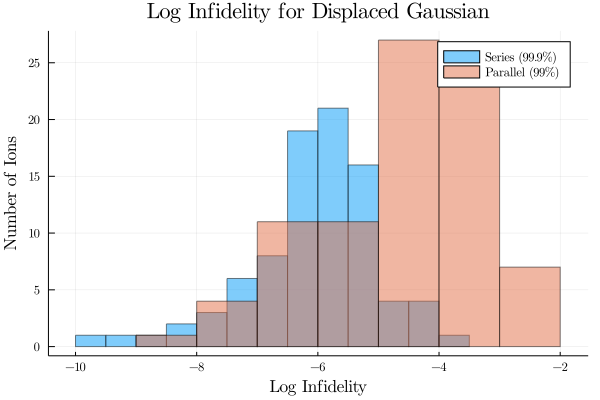

In [15]:
σ1 = .1
σ2 = .1  
using LaTeXStrings



raw = []
for (i, xx) in enumerate(x)
    yy = y[i]
    data = read("displaced_gaussian3/infid$xx,$yy.csv", String)
    push!(raw, data)
end
z3 = ([el[1] for el in [[parse(Float64, s) for s in split(zz, "\n")[1:end-1]] for zz in raw]])
using Plots

raw = []
for (i, xx) in enumerate(x)
    yy = y[i]
    data = read("displaced_gaussian2/infid$xx,$yy.csv", String)
    push!(raw, data)
end
z2 = ([el[1] for el in [[parse(Float64, s) for s in split(zz, "\n")[1:end-1]] for zz in raw]])
using Plots

raw = []
for (i, xx) in enumerate(x)
    yy = y[i]
    data = read("displaced_gaussian/2infid$xx,$yy.csv", String)
    push!(raw, data)
end
z1 = ([el[1] for el in [[parse(Float64, s) for s in split(zz, "\n")[1:end-1]] for zz in raw]])
using Plots

function gaussian(σ1, σ2, z)
    function func(x, y)
        x -= 2*.25
        y -= 2*.27
        (maximum(log.(10, z)) - minimum(log.(10, z)))*exp(-x^2/σ1^2 + -y^2/σ2^2) + minimum(log.(10, z))
    end
end

p = palette([:white, :black], 100);

scale = 2
plot(heatmap(xs, ys, gaussian(σ1, σ2, vcat(z1, z2,z3)); c=palette([:white, :red], 100), alpha=.5))

histogram(log.(10, z1), alpha=.5, label="Series (99.9%)", xlabel="Log Infidelity", ylabel="Number of Ions", title="Log Infidelity for Displaced Gaussian",  fontfamily="Computer Modern")
#histogram!(log.(10, z2), alpha=.5, label="")
histogram!(log.(10, z3), alpha=.5, label="Parallel (99%)")